In [1]:
import fastai
from fastai import *          # Quick access to most common functionality
from fastai.vision import *   # Quick access to computer vision functionality

In [2]:
data_dir = "flower_data"

# Models to choose from [resnet, alexnet, vgg, squeezenet, densenet, inception]
model_name = "resnet"

# Number of classes in the dataset
num_classes = 102

# Batch size for training (change depending on how much memory you have)
batch_size = 8

# Number of epochs to train for
num_epochs = 2

input_size = 224

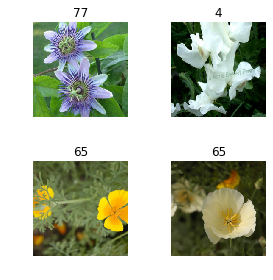

In [3]:
tfms = get_transforms()
data = (ImageItemList.from_folder(data_dir, bs=1)
        .split_by_folder()          
        .label_from_folder()
        .transform(tfms, size=224)
        .databunch()
        .normalize(imagenet_stats))

#data = ImageDataBunch.from_folder(data_dir, bs=8).transform(tfms, size=32).databunch().normalize(imagenet_stats)
# img,label = data.train_ds[0]
# img
data.show_batch(rows=2, figsize=(4,4))

In [4]:
learn = create_cnn(data, models.resnet18, metrics=accuracy)
learn.fit_one_cycle(1, 0.01)

epoch,train_loss,valid_loss,accuracy


RuntimeError: CUDA out of memory. Tried to allocate 24.50 MiB (GPU 0; 1.96 GiB total capacity; 1.04 GiB already allocated; 9.00 MiB free; 9.26 MiB cached)